# 1) Basic RNN on sine wave:

- `Recurrent Neural Network (RNN)`

<img src="../simple RNN/pictures/RNN_neural_network_01.png"
     style="float: center; width:350px;height:400;"/>
<caption><center> <u><b> Figure 2 </u></b>: RNN algorithm<br> </center></caption>
if there

In [1]:
# importing basic libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Sklearn:
from sklearn.preprocessing import MinMaxScaler

In [2]:
# creating our data:
X_inp = np.linspace(start=0, stop=50, num=501)
y_out = np.sin(X_inp)

In [3]:
# shape of our data:
print("X_inp shape= ", X_inp.shape)
print("y_out shape= ", y_out.shape)


X_inp shape=  (501,)
y_out shape=  (501,)


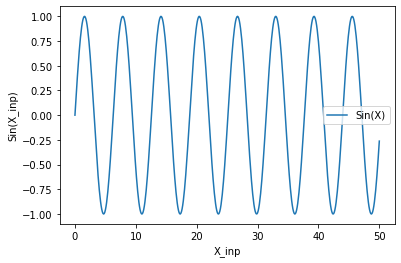

In [4]:
# plotting our data:
plt.plot(X_inp, y_out)
plt.xlabel("X_inp")
plt.ylabel("Sin(X_inp)")
plt.legend(["Sin(X)"])
plt.show()

In [5]:
# converting to DataFrame:
df = pd.DataFrame(data=y_out, index=X_inp, columns=["Sin(x)"])
df

,Sin(x)
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [6]:
# train / test split:
x_test_per = 0.1                       # 0.1 percent of whole data
x_test_number = np.round(len(df)*0.1)  # 50 data point for test data
x_test_index_s = int(len(df) - x_test_number)

In [7]:
# defining x_train & x_test:
x_train = df.iloc[:x_test_index_s]
x_test = df.iloc[x_test_index_s:]

In [8]:
# preprocessing data:
# using MinMaxSclaer:
MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(x_train)

# x_train_scaled:
# x_test_scaled:
x_train_scaled = MinMax_scaler.transform(x_train)
x_test_scaled = MinMax_scaler.transform(x_test)

In [9]:
# converting data to TimeSeries using TimeseriesGenerator:
sequence_length = 50
batch_size = 1
number_of_features=1

TimeSeries_gen = TimeseriesGenerator(data=x_train_scaled,
                                     targets=x_train_scaled,
                                     length=sequence_length,
                                     batch_size=batch_size)

In [10]:
# creating our RNN model:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50,
                        input_shape=(sequence_length, number_of_features)))
rnn_model.add(Dense(1))
              

rnn_model.compile(optimizer="adam", loss="mse")

In [11]:
# summary of the model:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [12]:
#
rnn_model.fit(TimeSeries_gen, epochs=5)

Epoch 1/5
401/401 [==============================] - 5s 10ms/step - loss: 0.0062
Epoch 2/5
401/401 [==============================] - 4s 9ms/step - loss: 1.0962e-04
Epoch 3/5
401/401 [==============================] - 4s 9ms/step - loss: 5.6672e-05
Epoch 4/5
401/401 [==============================] - 3s 9ms/step - loss: 1.7223e-05
Epoch 5/5
401/401 [==============================] - 4s 9ms/step - loss: 3.5536e-05


In [13]:
# saving the model after training:
rnn_model.save("..\\simple RNN\\saved_model\\sine_wave_predictor.h5")

In [14]:
# losses:
losses = pd.DataFrame(data=rnn_model.history.history)
losses

,loss
0,0.006246
1,0.000110
2,0.000057
3,0.000017
4,0.000036


<AxesSubplot:>

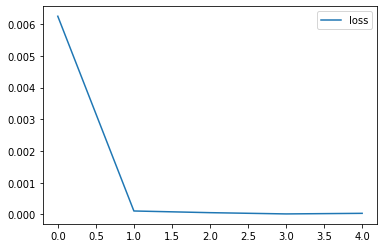

In [15]:
losses.plot()

In [16]:
# evaluation on one example:
# meaning given 50 data points, it'll predict => 51
first_eval_batch_01 = x_train_scaled[-sequence_length:]

# then we need to reshape the input so that it'll be compatible with network expected input shape:
# which is (batch_size, sequence_length, number_of_features)
first_eval_batch_01 = first_eval_batch_01.reshape(1, sequence_length, number_of_features)

In [17]:
# predicting the output:
predicted_by_network = rnn_model.predict(first_eval_batch_01)[0]

# the real output:
real_output = x_test_scaled[0]

In [18]:
print("the network output: ", predicted_by_network)
print("the real output: ", real_output)

the network output:  [0.94764173]
the real output:  [0.94955134]


In [19]:
# putting the above logic into a for loop for all datapoints:
test_predictions = []
first_eval_batch = x_train_scaled[-sequence_length:]
current_batch = first_eval_batch.reshape(1, sequence_length, number_of_features)

for i in range(len(x_test)):
    current_batch_pred = rnn_model.predict(current_batch)[0]
    test_predictions.append(current_batch_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_batch_pred]], axis=1)
    
    

In [20]:
test_predictions_arr = np.array(test_predictions)
print("all predictions:\n","they're scaled version:\n", test_predictions_arr)


all predictions:
 they're scaled version:
 [[9.4764173e-01]
 [9.6653759e-01]
 [9.8097551e-01]
 [9.9063945e-01]
 [9.9559569e-01]
 [9.9547744e-01]
 [9.8984754e-01]
 [9.7961855e-01]
 [9.6472049e-01]
 [9.4508600e-01]
 [9.2167008e-01]
 [8.9358687e-01]
 [8.6119545e-01]
 [8.2545507e-01]
 [7.8630042e-01]
 [7.4439263e-01]
 [7.0038295e-01]
 [6.5410650e-01]
 [6.0604393e-01]
 [5.5695915e-01]
 [5.0697184e-01]
 [4.5694947e-01]
 [4.0747327e-01]
 [3.5860088e-01]
 [3.1114152e-01]
 [2.6529339e-01]
 [2.2159243e-01]
 [1.8089753e-01]
 [1.4334452e-01]
 [1.0941476e-01]
 [7.9660460e-02]
 [5.4110721e-02]
 [3.3150878e-02]
 [1.7225552e-02]
 [6.2379865e-03]
 [6.2091090e-04]
 [1.8529035e-04]
 [4.6135718e-03]
 [1.4415932e-02]
 [2.9010689e-02]
 [4.8025668e-02]
 [7.1844637e-02]
 [9.9505246e-02]
 [1.3089579e-01]
 [1.6616106e-01]
 [2.0418647e-01]
 [2.4496412e-01]
 [2.8840059e-01]
 [3.3326143e-01]
 [3.7989426e-01]]


In [21]:
# conveting scaled version of predictoins to true values:
true_predictions = MinMax_scaler.inverse_transform(test_predictions_arr)
print("true predictions values:\n", true_predictions)

true predictions values:
 [[ 0.89527804]
 [ 0.93306947]
 [ 0.96194506]
 [ 0.9812728 ]
 [ 0.99118525]
 [ 0.99094874]
 [ 0.979689  ]
 [ 0.9592312 ]
 [ 0.9294353 ]
 [ 0.89016664]
 [ 0.84333515]
 [ 0.7871692 ]
 [ 0.7223869 ]
 [ 0.6509067 ]
 [ 0.57259804]
 [ 0.4887831 ]
 [ 0.40076444]
 [ 0.30821228]
 [ 0.21208794]
 [ 0.11391915]
 [ 0.01394533]
 [-0.0860986 ]
 [-0.1850502 ]
 [-0.2827942 ]
 [-0.37771216]
 [-0.4694077 ]
 [-0.5568089 ]
 [-0.638198  ]
 [-0.71330345]
 [-0.78116244]
 [-0.8406706 ]
 [-0.89176965]
 [-0.93368894]
 [-0.9655394 ]
 [-0.9875143 ]
 [-0.9987484 ]
 [-0.9996196 ]
 [-0.9907632 ]
 [-0.97115856]
 [-0.9419693 ]
 [-0.9039396 ]
 [-0.8563021 ]
 [-0.8009813 ]
 [-0.7382007 ]
 [-0.6676707 ]
 [-0.5916205 ]
 [-0.51006585]
 [-0.42319366]
 [-0.3334727 ]
 [-0.24020779]]


In [22]:
# adding preditions permanantly:
# ignore the error:
x_test['predictoins'] = true_predictions

e:\app_special\anaconda_onwin\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


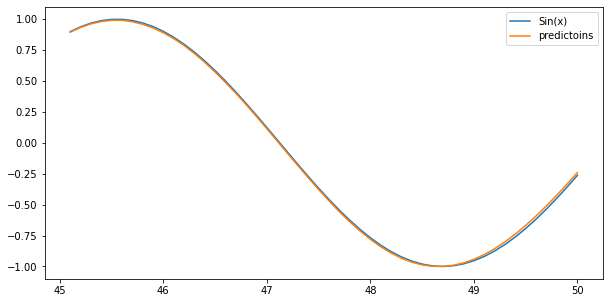

In [23]:
# plotting the result:
x_test.plot(figsize=(10, 5))
plt.show()